In [1]:
#Visualize the word embeddings we need
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline
import operator
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName,stitchMNISTSamples
from sklearn.feature_extraction.text import TfidfTransformer
result   = {}

In [45]:
data = loadHDF5('../../expt/evalWikicorp-exponly/pl-2-finopt-ejacob.h5')
print data.keys()

[u'ejacob', u'ejacob_probs', u'ejacob_energy']


In [44]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset
DATA = 'wikicorp'

dataset = loadDataset(DATA)
print dataset.keys()
additional_attrs        = {}
tfidf                   = TfidfTransformer(norm=None)
tfidf.fit(dataset['train'])
#Get normalized idf vectors
additional_attrs['idf'] = tfidf.idf_

['mapIdx', 'data_type', 'dim_observations', 'train', 'vocabulary_singular', 'test', 'vocabulary', 'valid']


In [5]:
from optvaemodels.evaluate_vecs import clusterEmbeddings, evaluateWordVectors,getWordSimilarity
from optvaemodels.evaluate_vecs import expectedJacobian, conditionalJacobian

In [82]:
vocab = dataset['vocabulary']
print data.keys()

[u'ejacob', u'ejacob_probs', u'ejacob_energy']


In [54]:
wordlist = ['artificial',
                  'intelligence',
                  'betterment',
                   'military',
                  'book',
                  'medicine',
                  'zen']

In [55]:
word_similarity=  getWordSimilarity(data['ejacob'], wordlist, dataset['vocabulary'],metric='cosine')
for w in word_similarity:
    print w,':',','.join(word_similarity[w]),'\n'

intelligence : intelligence,espionage,secrecy,interrogation,counterterrorism,roles,plotting 

zen : zen,dharma,buddhism,buddhas,buddha,meditation,yoga 

artificial : artificial,artificially,molecules,synthetic,soluble,cells,molecule 

book : book,author,books,reprinted,republished,paperback,written 

medicine : medicine,physicians,pathology,physician,medical,dentistry,clinical 

military : military,civilian,armys,commanders,infantry,army,battalions 



In [16]:
vocab[np.random.randint(vocab.shape[0],size=(12,))]

NameError: name 'vocab' is not defined

In [22]:
'intelligence' in dataset['vocabulary']

True

In [78]:
for f in glob.glob('../../expt/evalWikicorp-conditional/*h5'):
    words= os.path.basename(f).replace('.h5','').split('-')
    print 'Word: ',words[0], ' Context: ',words[1]
    if words[0]=='fire':
        words[0] = 'fires'
    if words[0] not in dataset['vocabulary']:
        continue
    data2 = loadHDF5(f)
    res  = getWordSimilarity(data2['cjacob'], [words[0]], dataset['vocabulary'] ,'cosine')
    print words[0],':',','.join(res[words[0]]),'\n'

Word:  crane  Context:  bird
crane : crane,cranes,erected,parkland,locally,farmland,causeway 

Word:  bank  Context:  money
bank : bank,banks,banking,government,bankers,comptroller,fiscal 

Word:  bank  Context:  river
bank : bank,watershed,footpath,confluence,drains,tributary,tributaries 

Word:  fire  Context:  burn
fires : fires,ignition,combustion,engines,fuel,engine,atmosphere 

Word:  crane  Context:  construction
crane : crane,cranes,lifting,usaaf,spanned,crushed,lift 

Word:  fire  Context:  layoff
fires : fires,thunderstorm,grassy,surrounded,walkway,burning,subterranean 



In [40]:
'fires' in dataset['vocabulary']

True

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(data['ejacob_energy'])
print X_reduced.shape,pca.components_.shape

(20253, 5) (5, 100)


In [84]:
for comp in X_reduced.T:#pca.components_:
    idx = np.argsort(comp)
    print [dataset['vocabulary'][k] for k in idx[:10].tolist()]
    print [dataset['vocabulary'][k] for k in idx[-10:].tolist()]
    print '\n'

['ligand', 'nucleon', 'angstrom', 'enzymology', 'sterol', 'cybertron', 'photons', 'anorgasmia', 'exudation', 'decepticons']
['murong', 'podlaskie', 'grapeshot', 'subcarpathian', 'gminas', 'renomination', 'baronetage', 'warmianmasurian', 'obec', 'kuyavianpomeranian']


['exudation', 'cosmographer', 'rayfinned', 'woreda', 'tambon', 'warmianmasurian', 'gminas', 'monotypic', 'lubusz', 'subcarpathian']
['allmusic', 'wrestlemania', 'gamewinning', 'autobot', 'oricon', 'cybertron', 'strikeouts', 'decepticons', 'decepticon', 'careerhigh']


['murong', 'oricon', 'cybertron', 'anorgasmia', 'noctuidae', 'angstrom', 'dones', 'nucleon', 'fulls', 'concertos']
['lubusz', 'shutouts', 'concacaf', 'censusdesignated', 'gminas', 'micropolitan', 'nonfamilies', 'kuyavianpomeranian', 'warmianmasurian', 'extratropical']


['backdate', 'algebras', 'enzymology', 'superliga', 'firmware', 'undrafted', 'careerhigh', 'concacaf', 'xml', 'cpu']
['grapeshot', 'tachinidae', 'tachinid', 'nonfamilies', 'chondrite', 'inflo

In [108]:
singular_vals = {}
singular_vals_prob = {}
singular_vals_pot = {}
for f in glob.glob('../../expt/evalWikicorp-exponly/*-ejacob.h5'):
    dd     = loadHDF5(f) 
    name =  os.path.basename(f).split('-eja')[0]
    ejacob = dd['ejacob']
    _,s,_  = np.linalg.svd(ejacob)
    singular_vals[name] = s
    ejacob = dd['ejacob_probs']
    _,s,_  = np.linalg.svd(ejacob)
    singular_vals_prob[name] = s
    ejacob = dd['ejacob_energy']
    _,s,_  = np.linalg.svd(ejacob)
    singular_vals_pot[name] = s
    print name

pl-2-none
pl-0-finopt
pl-2-finopt
pl-0-none


logsingular-jacob-wikicorp.pdf saved


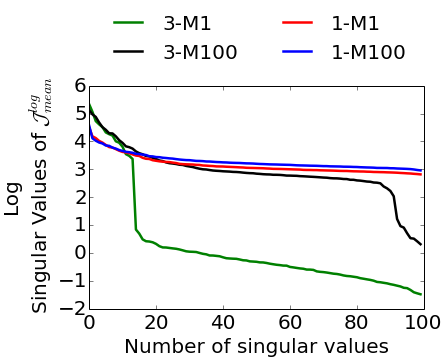

In [127]:

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-M100']  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-M100']  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'p'
markerFinal['1-M100'] = 'd'
markerFinal['3-M1']   =  '<'
markerFinal['3-M100'] =  '*'

namemap= {}
namemap['pl-0-none'] = '1-M1'
namemap['pl-0-finopt'] = '1-M100'
namemap['pl-2-none'] = '3-M1'
namemap['pl-2-finopt'] = '3-M100'
plt.plot(figsize=(16,20))
for k in singular_vals:
    name = namemap[k]
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    plt.plot(np.sort(np.log(singular_vals[k]))[::-1],color=COLOR,label=name)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)
plt.ylabel('Log\n Singular Values of $\mathcal{J}^{log}_{mean}$')
plt.xlabel('Number of singular values')
fname = 'logsingular-jacob-wikicorp.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

In [119]:
rcv2_singular_vals = {}
rcv2_singular_vals_prob = {}
rcv2_singular_vals_pot = {}
for f in glob.glob('../../expt/evalRCV2/*-ejacob.h5'):
    dd     = loadHDF5(f) 
    name =  os.path.basename(f).split('-eja')[0]
    ejacob = dd['ejacob']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals[name] = s
    ejacob = dd['ejacob_probs']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals_prob[name] = s
    ejacob = dd['ejacob_energy']
    _,s,_  = np.linalg.svd(ejacob)
    rcv2_singular_vals_pot[name] = s
    print name

pl-0-none
pl-2-none
pl-2-finopt
pl-0-finopt


logsingular-jacob-rcv2_miao.pdf saved


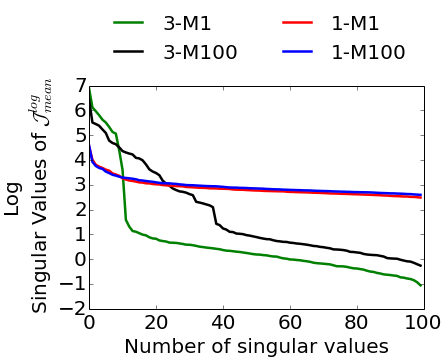

In [125]:

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-M100']  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-M100']  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'p'
markerFinal['1-M100'] = 'd'
markerFinal['3-M1']   =  '<'
markerFinal['3-M100'] =  '*'

namemap= {}
namemap['pl-0-none'] = '1-M1'
namemap['pl-0-finopt'] = '1-M100'
namemap['pl-2-none'] = '3-M1'
namemap['pl-2-finopt'] = '3-M100'
plt.plot(figsize=(8,10))
for k in rcv2_singular_vals:
    name = namemap[k]
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    plt.plot(np.sort(np.log(rcv2_singular_vals[k]))[::-1],color=COLOR,label=name)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)
plt.ylabel('Log\n Singular Values of $\mathcal{J}^{log}_{mean}$')
plt.xlabel('Number of singular values')
fname = 'logsingular-jacob-rcv2_miao.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')